## Data Analytics - Lab 3 - Prior and Posterior predictive distributions
<br>
Jan Pomykacz<br>
Nr. albumu: 401623<br>
Grupa: czwartek, 9:30

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Modeling prior predictive distribution

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__       N            y            p
count  1000.0         1000.0  1000.0  1000.000000  1000.000000
mean      0.0            0.0    50.0    10.112000     0.199922
std       0.0            0.0     0.0     2.846324     0.009681
min       0.0            0.0    50.0     2.000000     0.161190
25%       0.0            0.0    50.0     8.000000     0.193424
50%       0.0            0.0    50.0    10.000000     0.200093
75%       0.0            0.0    50.0    12.000000     0.206726
max       0.0            0.0    50.0    21.000000     0.230240
Mean of ratio: 0.20224000000000006


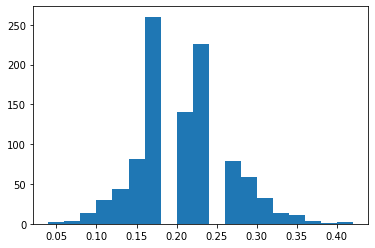

In [2]:
gen_quant = CmdStanModel(stan_file='prior.stan')

samples = gen_quant.sample(data={'N':50}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

df = samples.draws_pd()
ratio = df["y"] / 50
plt.hist(ratio, bins=19)
print(df.describe())
print(f"Mean of ratio: {ratio.mean()}")

# Mean of the ratio is consistent with prior knowledge, because for 1000 samples in multiple experiments it's around 20%

### Modeling posterior and posterior predictive distribution

INFO:cmdstanpy:compiling stan file /home/DataAnalytics_lab/lab3/posterior.stan to exe file /home/DataAnalytics_lab/lab3/posterior
INFO:cmdstanpy:compiled model executable: /home/DataAnalytics_lab/lab3/posterior
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.00000
mean,-23.173821,0.916518,1.075368,1.368750,2.342000,0.0,23.664955,0.198634,9.87375
std,0.708108,0.121599,0.068708,0.482526,0.943005,0.0,1.003999,0.009778,2.83960
min,-29.445100,0.105451,0.966981,1.000000,1.000000,0.0,22.683000,0.162300,1.00000
25%,-23.300550,0.882230,1.045910,1.000000,1.000000,0.0,22.957675,0.192122,8.00000
50%,-22.898350,0.968600,1.091065,1.000000,3.000000,0.0,23.332550,0.198437,10.00000
75%,-22.731550,1.000000,1.120522,2.000000,3.000000,0.0,24.034875,0.205079,12.00000
max,-22.682900,1.000000,1.152360,2.000000,7.000000,0.0,30.007900,0.230395,22.00000


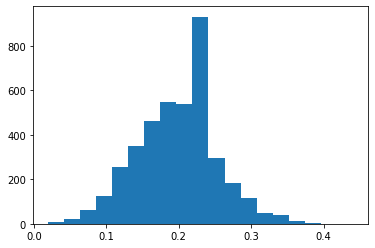

In [3]:
gen_quant2 = CmdStanModel(stan_file='posterior.stan')

samples2 = gen_quant2.sample(data={'N':50,'y':7})

df2 = samples2.draws_pd()
ratio2 = df2["y_pred"] / 50
plt.hist(ratio2, bins=19)
df2.describe()

In [6]:
predicted_ratio_stats = az.summary(ratio2.to_numpy(), hdi_prob=0.94)
predicted_p_stats = az.summary(df["p"].to_numpy(), hdi_prob=0.94)
print("Ratio stats: expected value = {0}, 94% density interval = {1}".format(predicted_ratio_stats["mean"][0], [predicted_ratio_stats["hdi_3%"][0], predicted_ratio_stats["hdi_97%"][0]]))
print("p stats: expected value = {0}, 94% density interval = {1}".format(predicted_p_stats["mean"][0], [predicted_p_stats["hdi_3%"][0], predicted_p_stats["hdi_97%"][0]]))

ratio_lower_prob = (ratio2 < 0.2).sum() / ratio2.count()
print(f"Probability that ratio is lower than the avg probability of traditional vaccines: {ratio_lower_prob}")

arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


Ratio stats: expected value = 0.197, 94% density interval = [0.1, 0.3]
p stats: expected value = 0.2, 94% density interval = [0.183, 0.218]
Probability that ratio is lower than the avg probability of traditional vaccines: 0.45775
